
#1. CARREGAMENTO DE DADOS E TRATAMENTO DAS COLUNAS RELACIONADAS A GRAVIDEZ



In [ ]:
import pandas as pd
import os

# --- Definindo as colunas de interesse ---
colunas_gestacao_gravidez = [
    'GESTACAO', 'GRAVIDEZ', 'MORTEPARTO', 'OBITOGRAV', 'OBITOPARTO',
    'OBITOPUERP', 'PARTO', 'PESO', 'DTOBITO', 'SEMAGESTAC', 'TPMORTEOCO',
    'TPOBITOCOR', 'CAUSAMAT', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
    'LINHAII', 'SEXO', 'QTDFILMORT', 'QTDFILVIVO', 'CAUSABAS', 'IDADEMAE'
]

# --- Dicionário de Mapeamento de Tipos com base no Documento ---
dtype_mapping = {
    'GESTACAO': 'Int8',
    'GRAVIDEZ': 'Int8',
    'MORTEPARTO': 'Int8',
    'OBITOGRAV': 'Int8',
    'OBITOPARTO': 'Int8',
    'OBITOPUERP': 'Int8',
    'PARTO': 'Int8',
    'SEMAGESTAC': 'Int8',
    'TPMORTEOCO': 'Int8',
    'TPOBITOCOR': 'Int8',
    'PESO': 'Int32',
    'CAUSAMAT': 'string',
    'LINHAA': 'string',
    'LINHAB': 'string',
    'LINHAC': 'string',
    'LINHAD': 'string',
    'LINHAII': 'string',
    'SEXO': 'string',
    'QTDFILMORT': 'Int8',
    'QTDFILVIVO': 'Int8',
    'CAUSABAS': 'string',
    'IDADEMAE': 'Int8'
}

# --- Carregando e processando apenas o arquivo de 2022 ---
caminho = '/content/drive/MyDrive/tcc_jonatas/dados/health/sim_2022.parquet'

if os.path.exists(caminho):
    try:
        # 1. Carrega o arquivo selecionando apenas as colunas de interesse
        dfSIM_2022 = pd.read_parquet(caminho, columns=colunas_gestacao_gravidez)

        # 2. Filtra o DataFrame para incluir apenas os óbitos de mulheres (SEXO == "2")
        df_mulheres_2022 = dfSIM_2022[dfSIM_2022["SEXO"] == "2"].copy()

        # 3. Converte a coluna de data para o formato datetime
        df_mulheres_2022['DTOBITO'] = pd.to_datetime(df_mulheres_2022['DTOBITO'], format='%m%d%Y', errors='coerce')

        # 4. Adiciona a coluna 'ANO'
        df_mulheres_2022['ANO'] = 2022

        # 5. Aplica o mapeamento de tipos de dados
        df_mulheres_2022 = df_mulheres_2022.astype(dtype_mapping, errors='ignore')

        print("DataFrame do SIM 2022 carregado, filtrado e ajustado com sucesso.")
        print("\nInformações do DataFrame final:")
        df_mulheres_2022.info()

        # Exibe as primeiras 5 linhas do DataFrame processado
        print("\nPrimeiras 5 linhas do DataFrame:")
        print(df_mulheres_2022.head())

    except Exception as e:
        print(f"Erro ao processar o arquivo de 2022: {e}")
else:
    print(f"Aviso: Arquivo de 2022 não encontrado em {caminho}")




DataFrame do SIM 2022 carregado, filtrado e ajustado com sucesso.

Informações do DataFrame final:
<class 'pandas.core.frame.DataFrame'>
Index: 698720 entries, 1 to 1544264
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   GESTACAO    12609 non-null   Int8          
 1   GRAVIDEZ    13277 non-null   Int8          
 2   MORTEPARTO  13018 non-null   Int8          
 3   OBITOGRAV   89271 non-null   Int8          
 4   OBITOPARTO  13109 non-null   Int8          
 5   OBITOPUERP  89254 non-null   Int8          
 6   PARTO       13211 non-null   Int8          
 7   PESO        12740 non-null   Int32         
 8   DTOBITO     276475 non-null  datetime64[ns]
 9   SEMAGESTAC  12609 non-null   Int8          
 10  TPMORTEOCO  88901 non-null   Int8          
 11  TPOBITOCOR  62431 non-null   Int8          
 12  CAUSAMAT    36 non-null      string        
 13  LINHAA      675705 non-null  string        
 14  LINHA

# 2. Estatisticas basicas relacionados aos obitos


In [ ]:
# 1. Cria uma versão temporária do DataFrame que NÃO contém linhas onde OBITOGRAV é 0.
# 2. A partir dessa versão filtrada, agrupa por 'ANO'.
# 3. Foca na coluna 'OBITOGRAV' e calcula as estatísticas descritivas.

estatisticas_obitos = df_mulheres_2022[df_mulheres_2022['OBITOGRAV'] != 0].groupby('ANO')['OBITOGRAV'].describe()


print("Estatísticas da coluna 'OBITOGRAV' por ano (IGNORANDO o valor 0):")
print(estatisticas_obitos)

Estatísticas da coluna 'OBITOGRAV' por ano (IGNORANDO o valor 0):
        count      mean       std  min  25%  50%  75%  max
ANO                                                       
2022  89271.0  3.125786  2.585945  1.0  2.0  2.0  2.0  9.0


count: Contagem - Mostra o número de casos que foram analisados para cada ano.

mean: Média - A média dos valores da coluna OBITOGRAV para cada ano.

std: Desvio padrão - Mede a dispersão dos dados em relação à média. Um valor baixo indica que os dados estão próximos da média, enquanto um valor alto significa que estão mais espalhados.

min: Mínimo - O menor valor registrado na coluna OBITOGRAV para cada ano.

25%: Primeiro Quartil - O valor abaixo do qual se encontram 25% dos dados.

50%: Mediana - É o valor do meio. Metade dos dados estão acima dele e metade estão abaixo.

75%: Terceiro Quartil - O valor abaixo do qual se encontram 75% dos dados.

max: Máximo - O maior valor registrado na coluna OBITOGRAV para cada ano.

 # 3. Analise temporal principais motivos de obitos

In [ ]:
# A linha abaixo assume que o df_mulheres_2022 já existe e está populado
# if 'df_mulheres_2022' in locals():

# Filtra o DataFrame para os óbitos na gravidez (OBITOGRAV = 1)
df_obitos_gravidez_2022 = df_mulheres_2022[df_mulheres_2022['OBITOGRAV'] == 1].copy()

# Verifica se o DataFrame filtrado não está vazio
if df_obitos_gravidez_2022.empty:
    print("Nenhum óbito na gravidez (OBITOGRAV = 1) encontrado no DataFrame para o ano de 2022.")
else:
    # Conta a frequência dos CIDs na coluna LINHAA
    frequencia_cids = df_obitos_gravidez_2022['LINHAA'].dropna().value_counts().head(5)

    if not frequencia_cids.empty:
        print("--- Top 5 Causas (LINHAA) para óbitos na gravidez em 2022 ---")
        print(frequencia_cids)
    else:
        print("Não foi possível gerar a análise de causas. A coluna 'LINHAA' não contém dados válidos para óbitos na gravidez em 2022.")

--- Top 5 Causas (LINHAA) para óbitos na gravidez em 2022 ---
LINHAA
*A419    93
*R571    63
*J960    43
*R570    37
*R092    36
Name: count, dtype: Int64


<Figure size 1500x800 with 0 Axes>

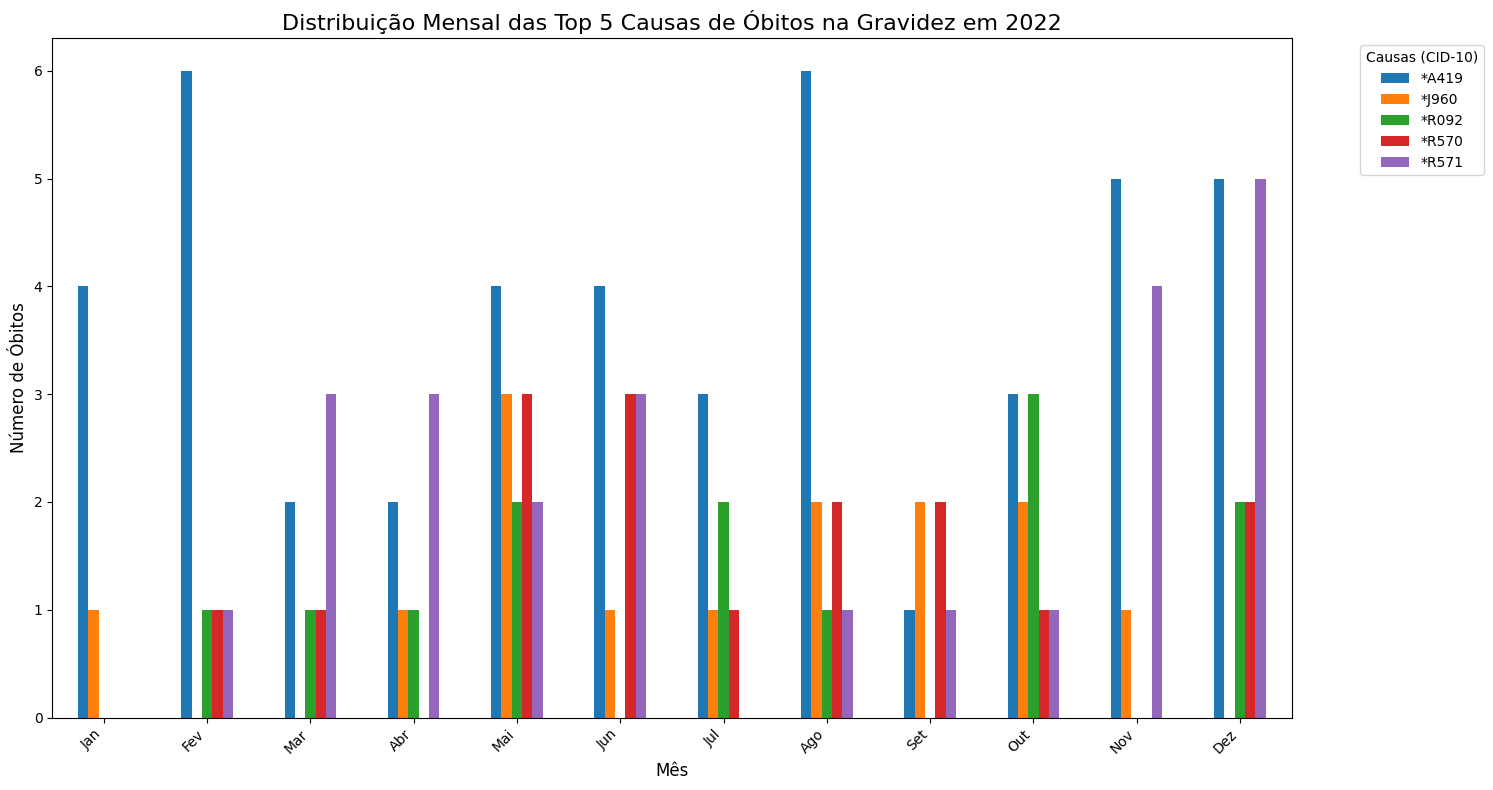

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Assumimos que 'df_mulheres_2022' já foi criado com o código anterior ---

if 'df_mulheres_2022' in locals() and not df_mulheres_2022.empty:
    # 1. Identifica as 5 causas mais frequentes para óbitos na gravidez (OBITOGRAV = 1)
    # Filtra o DataFrame para os óbitos na gravidez (OBITOGRAV = 1) ANTES de contar as causas
    df_obitos_gravidez_2022_temp = df_mulheres_2022[df_mulheres_2022['OBITOGRAV'] == 1].copy()

    if df_obitos_gravidez_2022_temp.empty:
        print("Nenhum óbito na gravidez (OBITOGRAV = 1) encontrado no DataFrame para o ano de 2022.")
    else:
        # Conta a frequência dos CIDs na coluna LINHAA para os óbitos na gravidez
        frequencia_cids = df_obitos_gravidez_2022_temp['LINHAA'].dropna().value_counts()

        if frequencia_cids.empty:
             print("Não foi possível gerar a análise de causas. A coluna 'LINHAA' não contém dados válidos para óbitos na gravidez em 2022.")
        else:
            top_5_causas = frequencia_cids.head(5).index

            # 2. Filtra o DataFrame ORIGINAL (df_mulheres_2022) para incluir apenas os óbitos na gravidez
            # com as top 5 causas E a coluna DTOBITO
            df_top_5_doencas = df_mulheres_2022[
                (df_mulheres_2022['OBITOGRAV'] == 1) &
                (df_mulheres_2022['LINHAA'].isin(top_5_causas))
            ].copy()


            if df_top_5_doencas.empty:
                 print("Nenhum óbito na gravidez com as top 5 causas encontrado no DataFrame para o ano de 2022.")
            else:
                # 3. Garante que 'DTOBITO' é do tipo datetime
                df_top_5_doencas['DTOBITO'] = pd.to_datetime(df_top_5_doencas['DTOBITO'], format='%m%d%Y', errors='coerce')

                # Remove linhas com DTOBITO nulo após a conversão
                df_top_5_doencas.dropna(subset=['DTOBITO'], inplace=True)

                if df_top_5_doencas.empty:
                    print("Nenhum óbito na gravidez com as top 5 causas e data válida encontrado no DataFrame para o ano de 2022.")
                else:
                    # 4. Prepara os dados para o gráfico
                    # Extrai o mês e o ano
                    df_top_5_doencas['MES'] = df_top_5_doencas['DTOBITO'].dt.month

                    # Conta o número de óbitos por mês e por doença
                    # Usa .size().unstack() para contar a frequência de cada combinação de mês e LINHAA
                    df_plot = df_top_5_doencas.groupby(['MES', 'LINHAA']).size().unstack(fill_value=0)

                    # Mapeia os números dos meses para seus nomes
                    meses_nomes_curtos = [
                        'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                        'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
                    ]
                    # Ensure the index is aligned before mapping
                    df_plot.index = pd.CategoricalIndex(df_plot.index, categories=range(1, 13), ordered=True)
                    df_plot = df_plot.sort_index()
                    df_plot.index = meses_nomes_curtos[:len(df_plot.index)]


                    # 5. Gera o Gráfico de Barras Agrupadas
                    plt.figure(figsize=(15, 8))
                    df_plot.plot(kind='bar', figsize=(15, 8))

                    plt.title('Distribuição Mensal das Top 5 Causas de Óbitos na Gravidez em 2022', fontsize=16)
                    plt.xlabel('Mês', fontsize=12)
                    plt.ylabel('Número de Óbitos', fontsize=12)
                    plt.xticks(rotation=45, ha='right')
                    plt.legend(title='Causas (CID-10)', bbox_to_anchor=(1.05, 1), loc='upper left')
                    plt.tight_layout()
                    plt.show()

else:
    print("O DataFrame 'df_mulheres_2022' não foi encontrado ou está vazio. Por favor, certifique-se de que o código de carregamento e filtragem foi executado primeiro.")

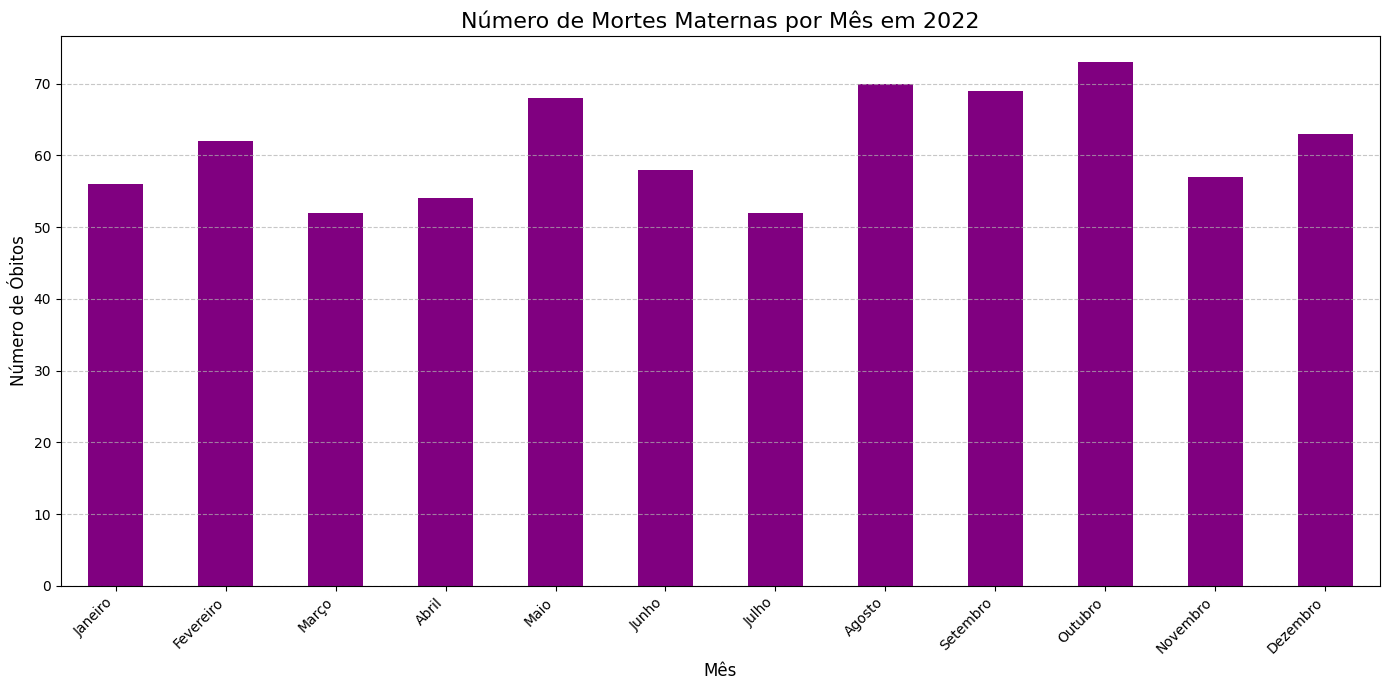


--- Distribuição Mensal de Mortes Maternas ---
A contagem de óbitos de mulheres grávidas ou em período pós-parto em 2022, mês a mês:

Janeiro      56
Fevereiro    62
Março        52
Abril        54
Maio         68
Junho        58
Julho        52
Agosto       70
Setembro     69
Outubro      73
Novembro     57
Dezembro     63


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if 'df_mulheres_2022' in locals():
    df_analise = df_mulheres_2022.copy()

    df_obitos_maternos = df_analise[
        (df_analise['OBITOGRAV'] == 1) |
        (df_analise['OBITOPARTO'] == 1) |
        (df_analise['OBITOPUERP'] == 1)
    ].copy()

    if df_obitos_maternos.empty:
        print("Nenhum óbito materno encontrado no DataFrame de 2022.")
    else:
        df_obitos_maternos['DTOBITO'] = pd.to_datetime(df_obitos_maternos['DTOBITO'], format='%m%d%Y', errors='coerce')

        # Extrai o mês do ano
        df_obitos_maternos['MES'] = df_obitos_maternos['DTOBITO'].dt.month

        # Mapeia os números dos meses para seus nomes
        meses_nomes = [
            'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
            'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
        ]

        # --- LINHA CORRIGIDA ---
        # Usa .dropna() para remover valores nulos antes da contagem
        mortes_por_mes = df_obitos_maternos['MES'].dropna().value_counts().sort_index()

        # Agora, os índices da série 'mortes_por_mes' serão inteiros
        mortes_por_mes.index = [meses_nomes[int(i)-1] for i in mortes_por_mes.index]

        # --- Gerar o Gráfico de Barras ---
        plt.figure(figsize=(14, 7))
        mortes_por_mes.plot(kind='bar', color='purple')
        plt.title('Número de Mortes Maternas por Mês em 2022', fontsize=16)
        plt.xlabel('Mês', fontsize=12)
        plt.ylabel('Número de Óbitos', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print("\n--- Distribuição Mensal de Mortes Maternas ---")
        print("A contagem de óbitos de mulheres grávidas ou em período pós-parto em 2022, mês a mês:\n")
        print(mortes_por_mes.to_string())

else:
    print("O DataFrame 'df_mulheres_2022' não foi encontrado. Por favor, certifique-se de que o código de carregamento foi executado primeiro.")

#4. INFORMAÇÕES CAUSAS E TIPO

## --- Análise 0: LIMPEZA E PREPARAÇÃO DOS DADOS ---

In [ ]:



print("--- ETAPA 0: Limpando e convertendo os tipos de dados ---")

# Lista de colunas que deveriam ser numéricas para nossas análises
colunas_numericas = ['GRAVIDEZ', 'PARTO', 'GESTACAO', 'QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE']

for coluna in colunas_numericas:
    # A função to_numeric converte os valores para números.
    # errors='coerce' transforma qualquer valor que não seja um número em NaN,
    # o que evita que o script quebre com valores inesperados.
    df_mulheres_2022[coluna] = pd.to_numeric(df_mulheres_2022[coluna], errors='coerce')

# [cite_start]A coluna de causa do óbito (CAUSABAS) é do tipo texto no dataset original[cite: 73].
df_mulheres_2022['CAUSABAS'] = df_mulheres_2022['CAUSABAS'].astype(str).str.strip()

print("Tipos de dados convertidos com sucesso.")
print("\n" + "="*50 + "\n")


# --- Análise 1: Mortalidade por Tipo de Gravidez ---
print("--- Análise 1: Mortalidade por Tipo de Gravidez ---")
# [cite_start]O mapeamento do tipo de gravidez é descrito na documentação[cite: 88].
mapeamento_gravidez = {1: 'Única', 2: 'Dupla', 3: 'Tripla e mais', 9: 'Ignorada'}
df_mulheres_2022['GRAVIDEZ_DESC'] = df_mulheres_2022['GRAVIDEZ'].map(mapeamento_gravidez)
contagem_por_gravidez = df_mulheres_2022['GRAVIDEZ_DESC'].value_counts()
print("Contagem de óbitos por tipo de gravidez:")
print(contagem_por_gravidez)
print("\n" + "="*50 + "\n")


# --- Análise 2: Causa do Óbito por Tipo de Parto ---
print("--- Análise 2: Causa do Óbito por Tipo de Parto ---")
# [cite_start]O mapeamento do tipo de parto é descrito na documentação[cite: 92].
mapeamento_parto = {1: 'Vaginal', 2: 'Cesáreo', 9: 'Ignorado'}
df_mulheres_2022['PARTO_DESC'] = df_mulheres_2022['PARTO'].map(mapeamento_parto)
analise_causas_parto = pd.crosstab(df_mulheres_2022['PARTO_DESC'], df_mulheres_2022['CAUSABAS'])
top_10_causas_parto = analise_causas_parto.sum().nlargest(10).index
print("Tabela Cruzada: Tipo de Parto vs. 10 Principais Causas de Óbito (códigos CID-10)")
print(analise_causas_parto[top_10_causas_parto])
print("\nObs: A interpretação completa dos resultados requer a consulta dos significados dos códigos da CID-10.")
print("\n" + "="*50 + "\n")


# --- Análise 3: Mortalidade por Idade Gestacional ---
print("--- Análise 3: Mortalidade por Idade Gestacional ---")
# [cite_start]O mapeamento das semanas de gestação é descrito na documentação[cite: 84].
mapeamento_gestacao = {
    1: 'Menos de 22 semanas',
    2: '22 a 27 semanas',
    3: '28 a 31 semanas',
    4: '32 a 36 semanas',
    5: '37 a 41 semanas',
    6: '42 semanas ou mais',
    9: 'Ignorado'
}
df_mulheres_2022['GESTACAO_DESC'] = df_mulheres_2022['GESTACAO'].map(mapeamento_gestacao)
contagem_por_gestacao = df_mulheres_2022['GESTACAO_DESC'].value_counts()
print("Contagem de óbitos por faixa de idade gestacional:")
print(contagem_por_gestacao)
print("\n" + "="*50 + "\n")


# --- Análise 4: Mortalidade por Histórico Obstétrico ---
print("--- Análise 4: Mortalidade por Histórico Obstétrico ---")
# [cite_start]Os dados sobre número de filhos mortos e vivos estão disponíveis na documentação[cite: 97].
# Agora que QTDFILMORT é numérico, a comparação '< 9' funcionará.
df_sem_ignorado_mortos = df_mulheres_2022.dropna(subset=['QTDFILMORT'])
df_sem_ignorado_mortos = df_sem_ignorado_mortos[df_sem_ignorado_mortos['QTDFILMORT'] < 9]
analise_hist_mortos = df_sem_ignorado_mortos.groupby('QTDFILMORT')['IDADEMAE'].agg(['count', 'mean', 'min', 'max'])
print("Análise de óbitos por n° de filhos MORTOS anteriormente:")
print(analise_hist_mortos)
print("\n")

df_sem_ignorado_vivos = df_mulheres_2022.dropna(subset=['QTDFILVIVO'])
df_sem_ignorado_vivos = df_sem_ignorado_vivos[df_sem_ignorado_vivos['QTDFILVIVO'] < 9]
analise_hist_vivos = df_sem_ignorado_vivos.groupby('QTDFILVIVO')['IDADEMAE'].agg(['count', 'mean', 'min', 'max'])
print("Análise de óbitos por n° de filhos VIVOS:")
print(analise_hist_vivos)
print("\n" + "="*50 + "\n")

--- ETAPA 0: Limpando e convertendo os tipos de dados ---
Tipos de dados convertidos com sucesso.


--- Análise 1: Mortalidade por Tipo de Gravidez ---
Contagem de óbitos por tipo de gravidez:
GRAVIDEZ_DESC
Única            11740
Dupla             1321
Ignorada           130
Tripla e mais       86
Name: count, dtype: int64


--- Análise 2: Causa do Óbito por Tipo de Parto ---
Tabela Cruzada: Tipo de Parto vs. 10 Principais Causas de Óbito (códigos CID-10)
CAUSABAS    P369  P220  P000  Q249  P77  P011  P072  P021  P027  P001
PARTO_DESC                                                           
Cesáreo      492   199   454   304  178    92    29   172    42    57
Ignorado       3     3     0    12    2     0     0     2     0     1
Vaginal      439   348    71   150  118   154   207    46   178   152

Obs: A interpretação completa dos resultados requer a consulta dos significados dos códigos da CID-10.


--- Análise 3: Mortalidade por Idade Gestacional ---
Contagem de óbitos por faixa de

## --- Análise 1: Mortalidade por Tipo de Gravidez ---

--- Análise 1: Mortalidade por Tipo de Gravidez ---
Contagem de óbitos por tipo de gravidez:
GRAVIDEZ_DESC
Única            11740
Dupla             1321
Ignorada           130
Tripla e mais       86
Name: count, dtype: int64




/tmp/ipython-input-3933427854.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_por_gravidez.index, y=contagem_por_gravidez.values, palette='mako')


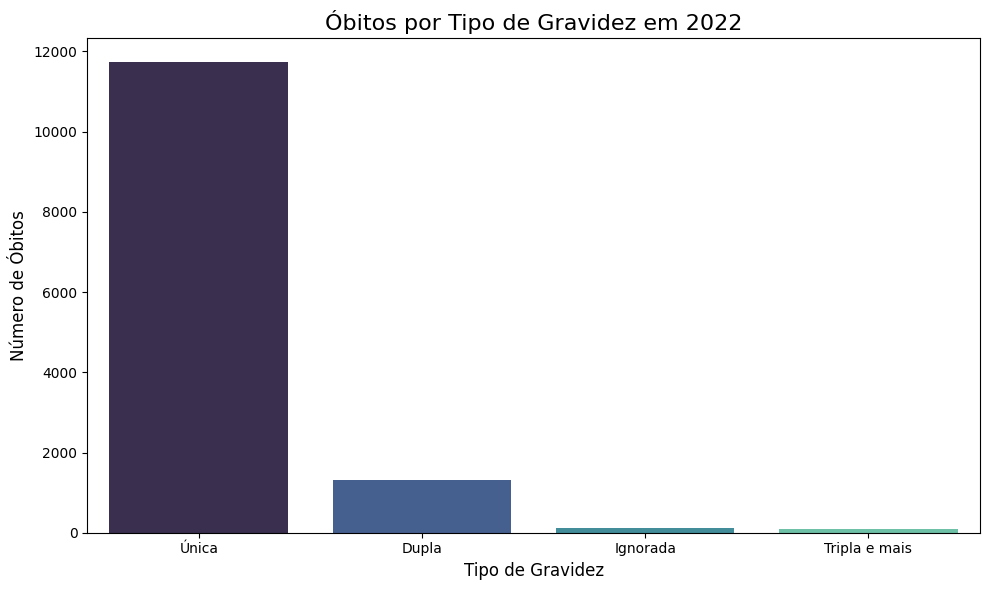

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# --- Análise 1: Mortalidade por Tipo de Gravidez ---
print("--- Análise 1: Mortalidade por Tipo de Gravidez ---")
mapeamento_gravidez = {1: 'Única', 2: 'Dupla', 3: 'Tripla e mais', 9: 'Ignorada'}
df_mulheres_2022['GRAVIDEZ_DESC'] = df_mulheres_2022['GRAVIDEZ'].map(mapeamento_gravidez)
contagem_por_gravidez = df_mulheres_2022['GRAVIDEZ_DESC'].value_counts()
print("Contagem de óbitos por tipo de gravidez:")
print(contagem_por_gravidez)
print("\n" + "="*50 + "\n")

# --- Geração do Gráfico de Barras ---
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_por_gravidez.index, y=contagem_por_gravidez.values, palette='mako')

# Adiciona títulos e rótulos
plt.title('Óbitos por Tipo de Gravidez em 2022', fontsize=16)
plt.xlabel('Tipo de Gravidez', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## --- Análise 2: Causa do Óbito por Tipo de Parto ---

Gráfico 2 salvo como 'grafico_2_causas_por_parto_heatmap.png'


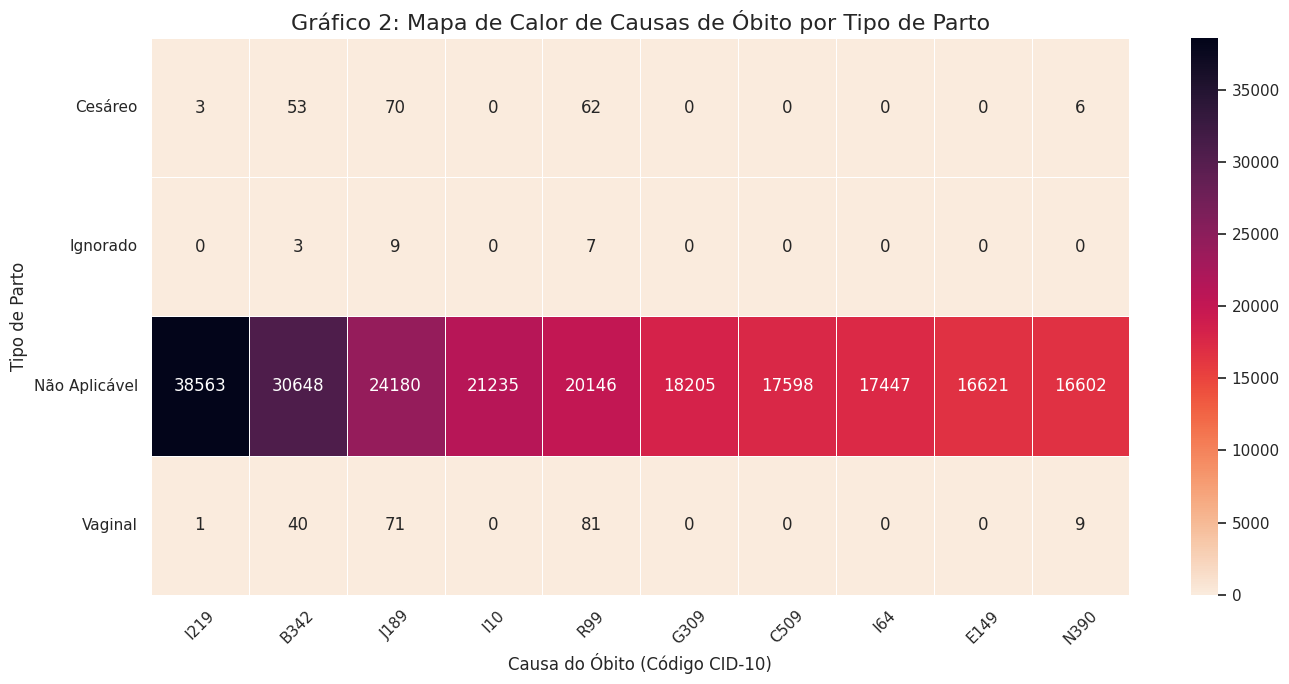

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




# --- ETAPA 0: LIMPEZA E PREPARAÇÃO DOS DADOS ---
colunas_numericas = ['GRAVIDEZ', 'PARTO', 'GESTACAO', 'QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE']
for coluna in colunas_numericas:
    df_mulheres_2022[coluna] = pd.to_numeric(df_mulheres_2022[coluna], errors='coerce')
df_mulheres_2022['CAUSABAS'] = df_mulheres_2022['CAUSABAS'].astype(str).str.strip()


# --- Análise 2: Recriar as variáveis necessárias ---
mapeamento_parto = {1: 'Vaginal', 2: 'Cesáreo', 9: 'Ignorado'}
df_mulheres_2022['PARTO_DESC'] = df_mulheres_2022['PARTO'].map(mapeamento_parto).fillna('Não Aplicável')
analise_causas_parto = pd.crosstab(df_mulheres_2022['PARTO_DESC'], df_mulheres_2022['CAUSABAS'])
top_10_causas_parto = analise_causas_parto.sum().nlargest(10).index
tabela_top_10 = analise_causas_parto[top_10_causas_parto]


# --- GERAÇÃO DO GRÁFICO ---
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.heatmap(tabela_top_10, annot=True, fmt="d", cmap="rocket_r", linewidths=.5)
plt.title('Gráfico 2: Mapa de Calor de Causas de Óbito por Tipo de Parto', fontsize=16)
plt.xlabel('Causa do Óbito (Código CID-10)', fontsize=12)
plt.ylabel('Tipo de Parto', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Salvar o gráfico como uma imagem
plt.savefig('grafico_2_causas_por_parto_heatmap.png')

print("Gráfico 2 salvo como 'grafico_2_causas_por_parto_heatmap.png'")

## --- Análise 3: Mortalidade por Idade Gestacional ---

/tmp/ipython-input-1227208363.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_por_gestacao.index, y=contagem_por_gestacao.values, palette="plasma")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Menos de 22 semanas'),
  Text(1, 0, '22 a 27 semanas'),
  Text(2, 0, '28 a 31 semanas'),
  Text(3, 0, '32 a 36 semanas'),
  Text(4, 0, '37 a 41 semanas'),
  Text(5, 0, '42 semanas ou mais'),
  Text(6, 0, 'Ignorado')])

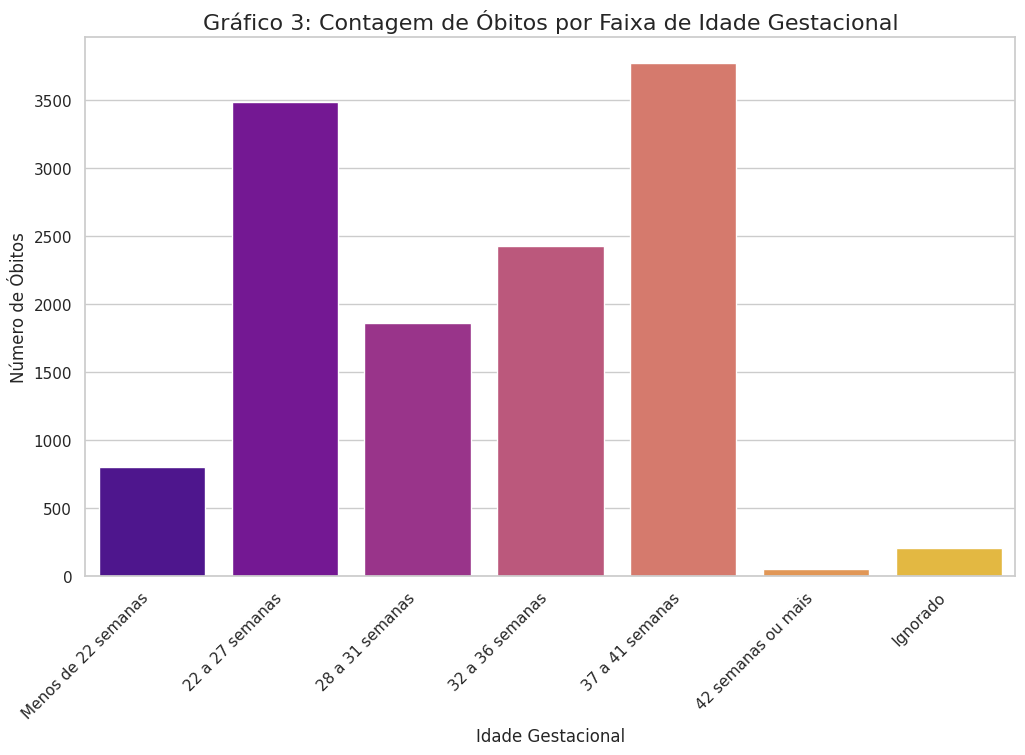

In [ ]:
# --- Gráfico da Análise 3: Mortalidade por Idade Gestacional ---

# Recalcula os dados para a análise
mapeamento_gestacao = {
    1: 'Menos de 22 semanas',
    2: '22 a 27 semanas',
    3: '28 a 31 semanas',
    4: '32 a 36 semanas',
    5: '37 a 41 semanas',
    6: '42 semanas ou mais',
    9: 'Ignorado'
}
df_mulheres_2022['GESTACAO_DESC'] = df_mulheres_2022['GESTACAO'].map(mapeamento_gestacao)
contagem_por_gestacao = df_mulheres_2022['GESTACAO_DESC'].value_counts()

# Reordena os dados para que o eixo x siga a ordem cronológica da gestação
ordem_gestacao = list(mapeamento_gestacao.values())
contagem_por_gestacao = contagem_por_gestacao.reindex(ordem_gestacao).dropna()

# Criação do Gráfico
plt.figure(figsize=(12, 7))
sns.barplot(x=contagem_por_gestacao.index, y=contagem_por_gestacao.values, palette="plasma")

# Adiciona títulos e rótulos
plt.title('Gráfico 3: Contagem de Óbitos por Faixa de Idade Gestacional', fontsize=16)
plt.xlabel('Idade Gestacional', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos para melhor visualização

# Exibe o gráfi

## --- Análise 4: Mortalidade por Histórico Obstétrico ---

--- Análise 4: Mortalidade por Histórico Obstétrico ---
Análise de óbitos por n° de filhos MORTOS anteriormente:
            count       mean  min  max
QTDFILMORT                            
0            8656  26.595541    8   99
1            2431  29.480049   12   99
2             601  30.975042   14   48
3             168  31.857143   17   48
4              63  32.761905   18   44
5              23  32.173913   19   45
6              13  31.076923   17   41
7              10       33.5   20   43
8               1       42.0   42   42




/tmp/ipython-input-2099440904.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=analise_hist_mortos.index, y=analise_hist_mortos['count'], palette='rocket')


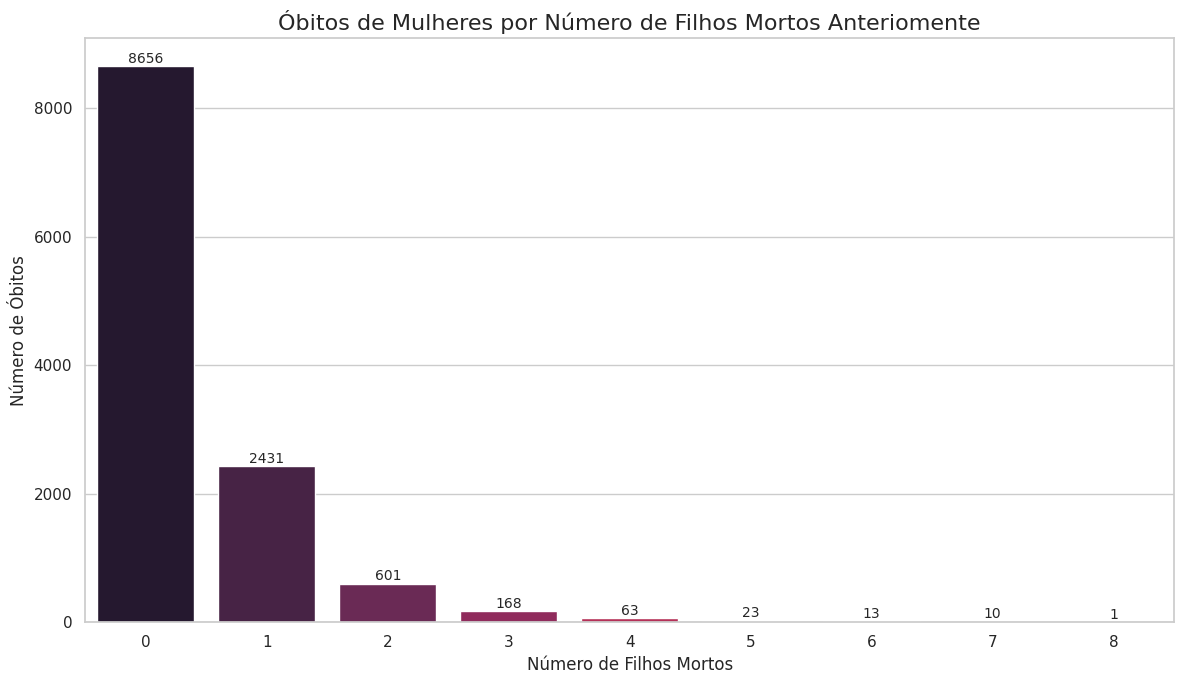

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- Análise 4: Mortalidade por Histórico Obstétrico ---
print("--- Análise 4: Mortalidade por Histórico Obstétrico ---")
# [cite_start]Os dados sobre número de filhos mortos e vivos estão disponíveis na documentação[cite: 97].
# Agora que QTDFILMORT é numérico, a comparação '< 9' funcionará.
df_sem_ignorado_mortos = df_mulheres_2022.dropna(subset=['QTDFILMORT'])
df_sem_ignorado_mortos = df_sem_ignorado_mortos[df_sem_ignorado_mortos['QTDFILMORT'] < 9]
analise_hist_mortos = df_sem_ignorado_mortos.groupby('QTDFILMORT')['IDADEMAE'].agg(['count', 'mean', 'min', 'max'])
print("Análise de óbitos por n° de filhos MORTOS anteriormente:")
print(analise_hist_mortos)
print("\n" + "="*50 + "\n")

# --- Geração do Gráfico ---
plt.figure(figsize=(12, 7))
sns.barplot(x=analise_hist_mortos.index, y=analise_hist_mortos['count'], palette='rocket')

# Adiciona os rótulos de contagem em cada barra
for index, value in enumerate(analise_hist_mortos['count']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Óbitos de Mulheres por Número de Filhos Mortos Anteriomente', fontsize=16)
plt.xlabel('Número de Filhos Mortos', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

--- Análise 1: Mortalidade por Tipo de Gravidez ---
Contagem de óbitos por tipo de gravidez:
GRAVIDEZ_DESC
Única            11740
Dupla             1321
Ignorada           130
Tripla e mais       86
Name: count, dtype: int64




/tmp/ipython-input-597093215.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_por_gravidez.index, y=contagem_por_gravidez.values, palette='mako')


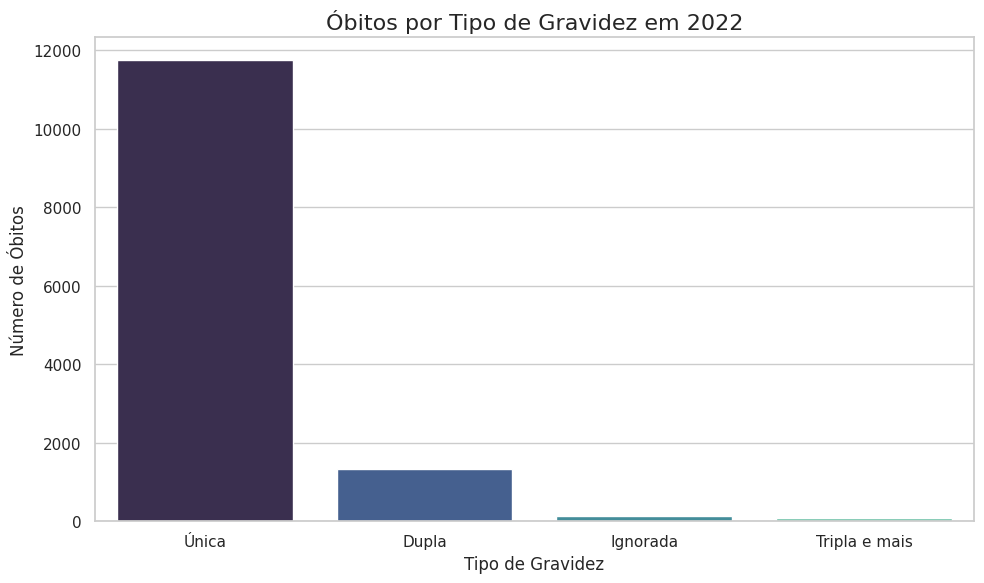

In [ ]:

# --- Análise 1: Mortalidade por Tipo de Gravidez ---
print("--- Análise 1: Mortalidade por Tipo de Gravidez ---")
# [cite_start]O mapeamento do tipo de gravidez é descrito na documentação. [cite: 88]
mapeamento_gravidez = {1: 'Única', 2: 'Dupla', 3: 'Tripla e mais', 9: 'Ignorada'}
df_mulheres_2022['GRAVIDEZ_DESC'] = df_mulheres_2022['GRAVIDEZ'].map(mapeamento_gravidez)
contagem_por_gravidez = df_mulheres_2022['GRAVIDEZ_DESC'].value_counts()
print("Contagem de óbitos por tipo de gravidez:")
print(contagem_por_gravidez)
print("\n" + "="*50 + "\n")

# --- Geração do Gráfico ---
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_por_gravidez.index, y=contagem_por_gravidez.values, palette='mako')

# Adiciona títulos e rótulos
plt.title('Óbitos por Tipo de Gravidez em 2022', fontsize=16)
plt.xlabel('Tipo de Gravidez', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Exibe o gráfico
plt.show()

/tmp/ipython-input-2300230659.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


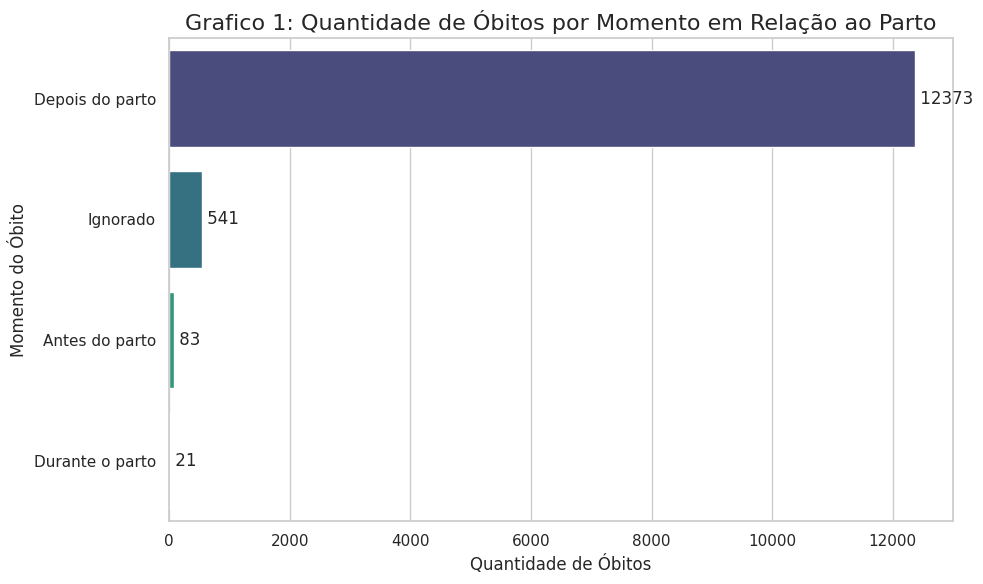

   Código  Quantidade        Descrição
1       3       12373  Depois do parto
2       9         541         Ignorado
3       1          83   Antes do parto
4       2          21  Durante o parto


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Garante que a 'tabela_final' esteja correta antes de plotar.
morteparto_contagem = df_mulheres_2022['MORTEPARTO'].value_counts(dropna=False)
tabela_final = morteparto_contagem.reset_index()
tabela_final.columns = ['Código', 'Quantidade']
tabela_final['Código'] = pd.to_numeric(tabela_final['Código'], errors='coerce').astype('Int64')

mapa_descricoes = {
    1: 'Antes do parto',
    2: 'Durante o parto',
    3: 'Depois do parto',
    9: 'Ignorado'
}
tabela_final['Descrição'] = tabela_final['Código'].map(mapa_descricoes)
tabela_final['Descrição'] = tabela_final['Descrição'].fillna('Não Aplicável / Nulo')

# Filtra os códigos não relevantes (0 e Nulos) para um gráfico mais limpo
tabela_grafico = tabela_final[tabela_final['Código'].isin([1, 2, 3, 9])].copy()


# --- Etapa 2: Criação do Gráfico de Barras ---

# Define o estilo do gráfico
sns.set_style("whitegrid")

# Define o tamanho da figura para melhor visualização
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
# Usamos 'Descrição' no eixo Y e 'Quantidade' no eixo X para um gráfico horizontal,
# que é mais fácil de ler com nomes de categorias longos.
barplot = sns.barplot(
    x='Quantidade',
    y='Descrição',
    data=tabela_grafico.sort_values('Quantidade', ascending=False), # Ordena as barras
    palette='viridis' # Define uma paleta de cores
)

# Adiciona os valores exatos no final de cada barra para clareza
for index, value in enumerate(tabela_grafico.sort_values('Quantidade', ascending=False)['Quantidade']):
    plt.text(value, index, f' {value}', va='center')


# Adiciona título e rótulos aos eixos
plt.title('Grafico 1: Quantidade de Óbitos por Momento em Relação ao Parto', fontsize=16)
plt.xlabel('Quantidade de Óbitos', fontsize=12)
plt.ylabel('Momento do Óbito', fontsize=12)

# Exibe o gráfico
plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()
print(tabela_grafico)